In [7]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

# text preprocessing
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()


## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('Cleaned_Reviews_electronics_headphones.csv')

In [33]:
df.head(3)

,Unnamed: 0,Rating,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,brand,...,price,cat,review_text,rating_cat,clean_text,year,rating_category,token,review_length,review_length_bin
0,6,5,A2X4TZM7CXZYLQ,B00004UE2D,Danh le,1506384000,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,...,$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",In very great condition. Loved it overall It c...,good,great condition love overall come fresh new bo...,2017,1,"['great', 'condition', 'love', 'overall', 'com...",24,"(0.0, 100.0]"
1,7,2,A2EV1FI3EDBOD2,B00004UE2D,Venelina,1506124800,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,...,$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",I am writing a two star review because it says...,bad,write two star review say write two star revie...,2017,0,"['write', 'two', 'star', 'review', 'say', 'wri...",70,"(0.0, 100.0]"
2,8,1,A1B3TNHKV3M24H,B00004UE2D,KristenNc,1505433600,"['Musical Instruments', 'Guitars', 'Classical ...","['The Yamaha C40 is an affordable, classical g...",Yh C40 Fll Size Nyln-Sring Clssicl Gir Tn Fll,Yamaha,...,$22.99,"Musical Instruments,Guitars,Classical & Nylon-...",Arrived damaged! Guitar arrived on time but th...,bad,arrive damage guitar arrive time base major ga...,2017,0,"['arrive', 'damage', 'guitar', 'arrive', 'time...",53,"(0.0, 100.0]"


In [34]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20771 entries, 0 to 20770
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         20771 non-null  int64 
 1   Rating             20771 non-null  int64 
 2   reviewerID         20771 non-null  object
 3   asin               20771 non-null  object
 4   reviewerName       20771 non-null  object
 5   unixReviewTime     20771 non-null  int64 
 6   category           20771 non-null  object
 7   description        20771 non-null  object
 8   title              20771 non-null  object
 9   brand              20771 non-null  object
 10  feature            20771 non-null  object
 11  rank               20771 non-null  object
 12  main_cat           20771 non-null  object
 13  similar_item       20771 non-null  object
 14  date               20771 non-null  object
 15  price              20771 non-null  object
 16  cat                20771 non-null  objec

In [35]:
df1 = df.drop(['Unnamed: 0','date','cat','Rating','unixReviewTime','description','category','title','price','similar_item','reviewerName','feature','rank','main_cat'],axis=1)

In [36]:
df1.head()

,reviewerID,asin,brand,review_text,rating_cat,clean_text,year,rating_category,token,review_length,review_length_bin
0,A2X4TZM7CXZYLQ,B00004UE2D,Yamaha,In very great condition. Loved it overall It c...,good,great condition love overall come fresh new bo...,2017,1,"['great', 'condition', 'love', 'overall', 'com...",24,"(0.0, 100.0]"
1,A2EV1FI3EDBOD2,B00004UE2D,Yamaha,I am writing a two star review because it says...,bad,write two star review say write two star revie...,2017,0,"['write', 'two', 'star', 'review', 'say', 'wri...",70,"(0.0, 100.0]"
2,A1B3TNHKV3M24H,B00004UE2D,Yamaha,Arrived damaged! Guitar arrived on time but th...,bad,arrive damage guitar arrive time base major ga...,2017,0,"['arrive', 'damage', 'guitar', 'arrive', 'time...",53,"(0.0, 100.0]"
3,A1R38HWRXBMKA4,B00004UE2D,Yamaha,Five Stars Very good! No problems all all!,good,five star good no problehems,2017,1,"['five', 'star', 'good', 'no', 'problehems']",10,"(0.0, 100.0]"
4,A1865S6TEXPNX0,B00004UE2D,Yamaha,Five Stars Love it,good,five star love,2017,1,"['five', 'star', 'love']",4,"(0.0, 100.0]"


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20771 entries, 0 to 20770
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   reviewerID         20771 non-null  object
 1   asin               20771 non-null  object
 2   brand              20771 non-null  object
 3   review_text        20771 non-null  object
 4   rating_cat         20771 non-null  object
 5   clean_text         20771 non-null  object
 6   year               20771 non-null  int64 
 7   rating_category    20771 non-null  int64 
 8   token              20771 non-null  object
 9   review_length      20771 non-null  int64 
 10  review_length_bin  20771 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.7+ MB


In [39]:
X = df1['clean_text']
y = df1['rating_category']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(15578,)
Test Set Shape		:(5193,)


In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [43]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

In [44]:
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [45]:
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 13147


In [46]:
vocab = count_vect.get_feature_names()

In [47]:
pd.DataFrame(count_vect_train, columns = vocab).head()

,_____,_______________,_out_,_too_,_whole_,aa,aaa,aaaaa,aaaaaaa,aaaaaaaaa,...,zoom,zoran,zorro,zorrofs,zulacks,zw,zx,zxs,zz,zzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

In [49]:
clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

f1 score: 0.7288599632462553


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.16      0.17       846
           1       0.84      0.84      0.84      4347

    accuracy                           0.73      5193
   macro avg       0.50      0.50      0.50      5193
weighted avg       0.73      0.73      0.73      5193



In [51]:
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.9259936215856597


In [52]:
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79       846
           1       0.98      0.93      0.95      4347

    accuracy                           0.92      5193
   macro avg       0.84      0.91      0.87      5193
weighted avg       0.93      0.92      0.93      5193



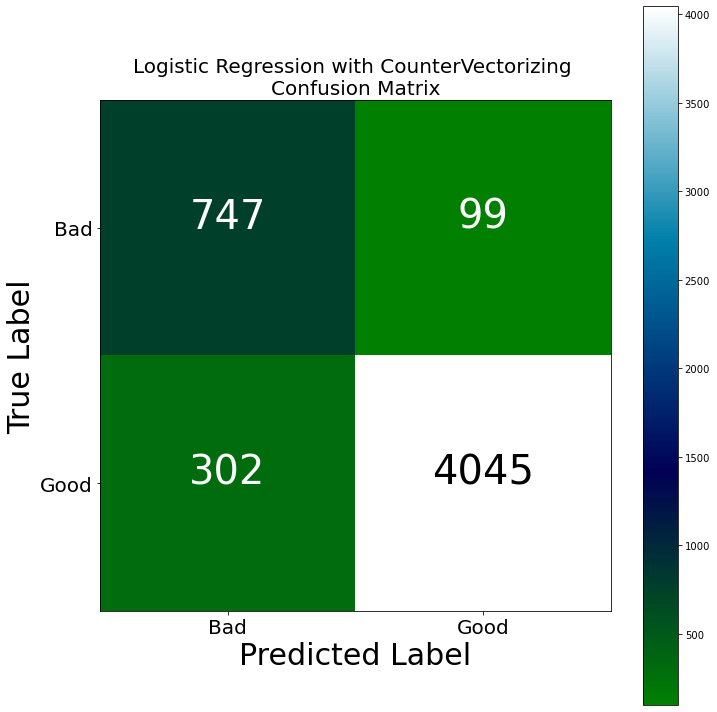

In [53]:
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

In [54]:
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score: 0.9121692915513877


In [55]:
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.90      0.57      0.70       846
           1       0.92      0.99      0.95      4347

    accuracy                           0.92      5193
   macro avg       0.91      0.78      0.83      5193
weighted avg       0.92      0.92      0.91      5193



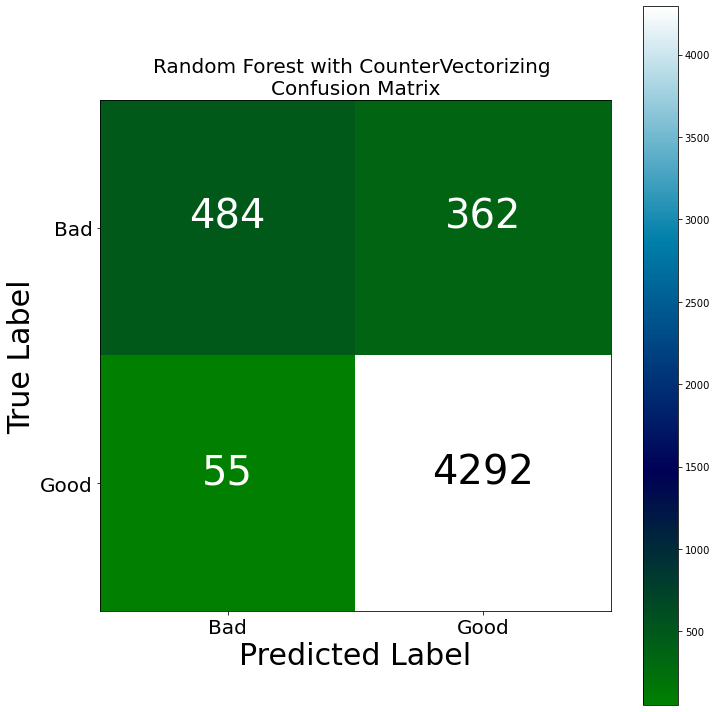

In [56]:
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

In [57]:
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

f1 score: 0.9159480164568572


In [58]:
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       846
           1       0.95      0.95      0.95      4347

    accuracy                           0.92      5193
   macro avg       0.85      0.85      0.85      5193
weighted avg       0.92      0.92      0.92      5193



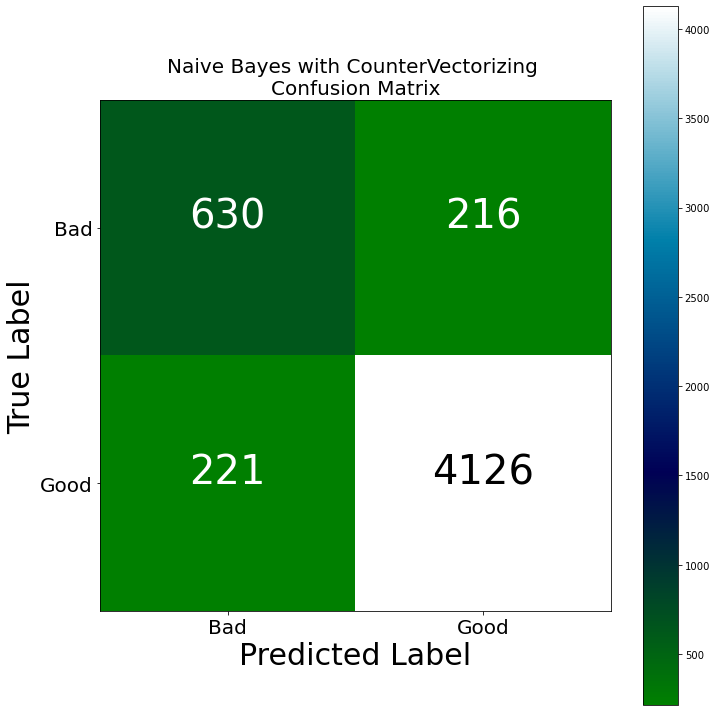

In [60]:
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

In [61]:
modeling(XGBClassifier())

y_pred_cv_xgb = y_pred

[02:38:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score: 0.9314419982354524


In [62]:
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       846
           1       0.95      0.97      0.96      4347

    accuracy                           0.93      5193
   macro avg       0.89      0.85      0.87      5193
weighted avg       0.93      0.93      0.93      5193



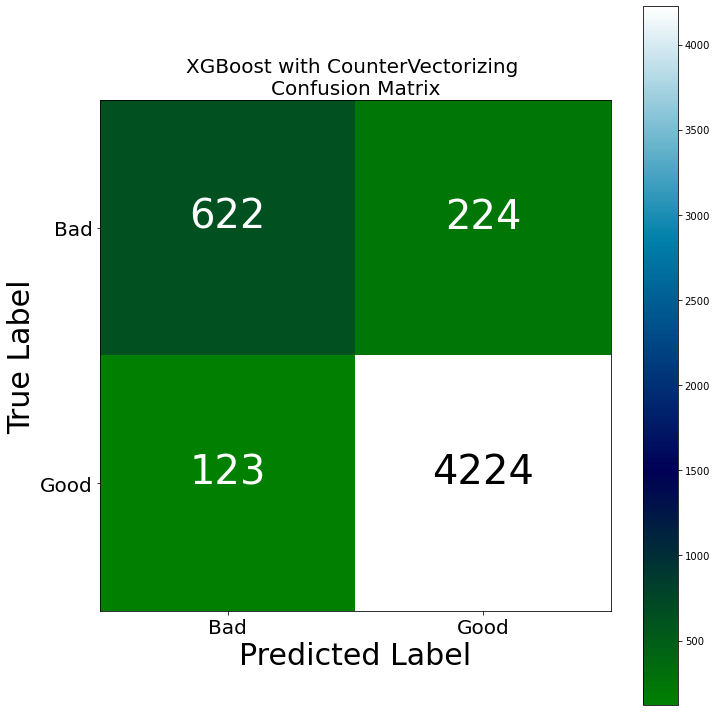

In [63]:
disp_confusion_matrix(y_pred_cv_xgb, "XGBoost")

In [64]:
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, 
                            depth=2, loss_function='Logloss'))

# Assign y_pred to a variable for further process
y_pred_cv_catboost = y_pred

0:	learn: 0.3863534	total: 226ms	remaining: 22.4s
1:	learn: 0.3398047	total: 276ms	remaining: 13.5s
2:	learn: 0.3208117	total: 324ms	remaining: 10.5s
3:	learn: 0.3025186	total: 373ms	remaining: 8.96s
4:	learn: 0.2823929	total: 419ms	remaining: 7.96s
5:	learn: 0.2700812	total: 464ms	remaining: 7.27s
6:	learn: 0.2625763	total: 516ms	remaining: 6.85s
7:	learn: 0.2458139	total: 563ms	remaining: 6.48s
8:	learn: 0.2391923	total: 610ms	remaining: 6.17s
9:	learn: 0.2349482	total: 633ms	remaining: 5.7s
10:	learn: 0.2300574	total: 649ms	remaining: 5.25s
11:	learn: 0.2264383	total: 668ms	remaining: 4.89s
12:	learn: 0.2201551	total: 683ms	remaining: 4.57s
13:	learn: 0.2156699	total: 696ms	remaining: 4.28s
14:	learn: 0.2114918	total: 711ms	remaining: 4.03s
15:	learn: 0.2090678	total: 725ms	remaining: 3.81s
16:	learn: 0.2072477	total: 742ms	remaining: 3.62s
17:	learn: 0.2013835	total: 758ms	remaining: 3.45s
18:	learn: 0.1968880	total: 773ms	remaining: 3.29s
19:	learn: 0.1953265	total: 790ms	remainin

In [65]:
print(classification_report(y_test, y_pred_cv_catboost))

              precision    recall  f1-score   support

           0       0.79      0.70      0.75       846
           1       0.94      0.96      0.95      4347

    accuracy                           0.92      5193
   macro avg       0.87      0.83      0.85      5193
weighted avg       0.92      0.92      0.92      5193



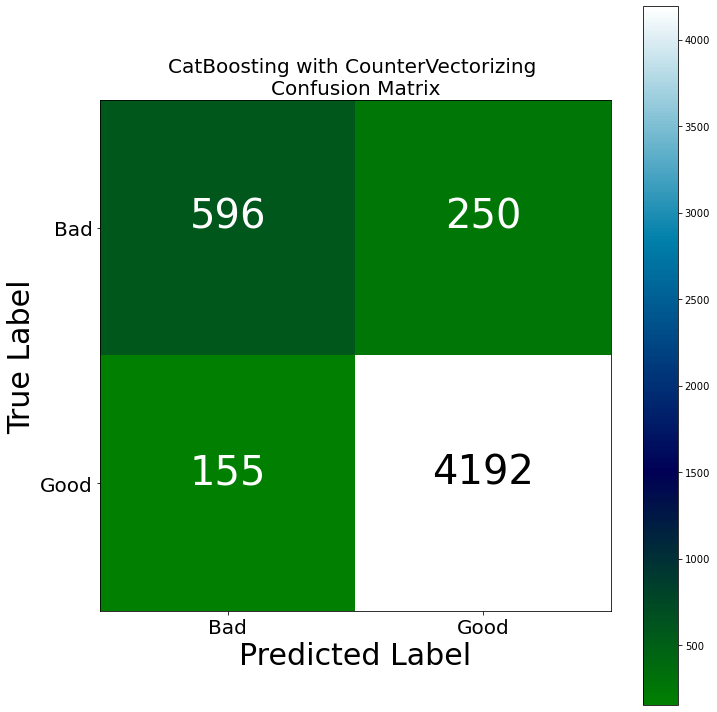

In [66]:
disp_confusion_matrix(y_pred_cv_catboost, "CatBoosting")

In [67]:
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [68]:
def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])


In [69]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

In [70]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb, y_pred_cv_xgb, y_pred_cv_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [71]:
df_tv2

precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.922781 bad       0.712107  0.882979  0.788391   
                                  good      0.976110  0.930527  0.952774   
                                  average   0.933101  0.922781  0.925994   
           Random Forest 0.919700 bad       0.897959  0.572104  0.698917   
                                  good      0.922217  0.987348  0.953672   
                                  average   0.918265  0.919700  0.912169   
           Naive Bayes   0.915848 bad       0.740306  0.744681  0.742487   
                                  good      0.950253  0.949160  0.949707   
                                  average   0.916050  0.915848  0.915948   
           XGBoost       0.933179 bad       0.834899  0.735225  0.781898   
                                  good      0.949640  0.971705  0.960546   
                                  average   0.930948  0.933179  0.931442   
           CatBoost      0.922010 bad       0.793609  0.704492  0.746399   
                                  good      0.943719  0.964343  0.953920   
                                  average   0.919264  0.922010  0.920112   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.922781 bad        846.0  
                                  good      4347.0  
                                  average   5193.0  
           Random Forest 0.919700 bad        846.0  
                                  good      4347.0  
                                  average   5193.0  
           Naive Bayes   0.915848 bad        846.0  
                                  good      4347.0  
                                  average   5193.0  
           XGBoost       0.933179 bad        846.0  
                                  good      4347.0  
                                  average   5193.0  
           CatBoost      0.922010 bad        846.0  
                                  good      4347.0  
                                  average   5193.0

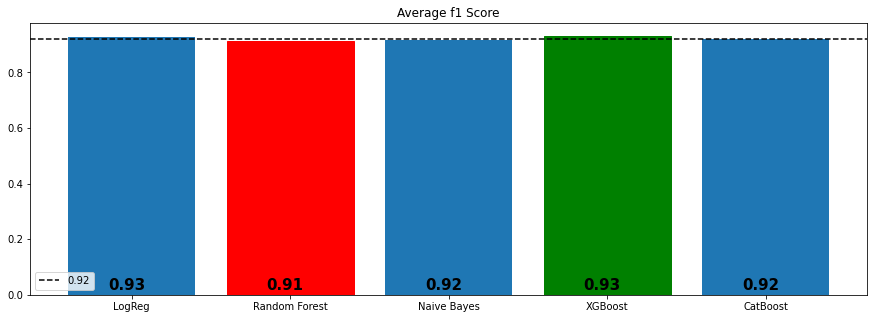

In [72]:
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

In [73]:
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

In [74]:
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

f1 score: 0.9101094997365061


In [75]:
print(classification_report(y_test, y_pred_tfidf_logreg))

              precision    recall  f1-score   support

           0       0.64      0.92      0.76       846
           1       0.98      0.90      0.94      4347

    accuracy                           0.90      5193
   macro avg       0.81      0.91      0.85      5193
weighted avg       0.93      0.90      0.91      5193



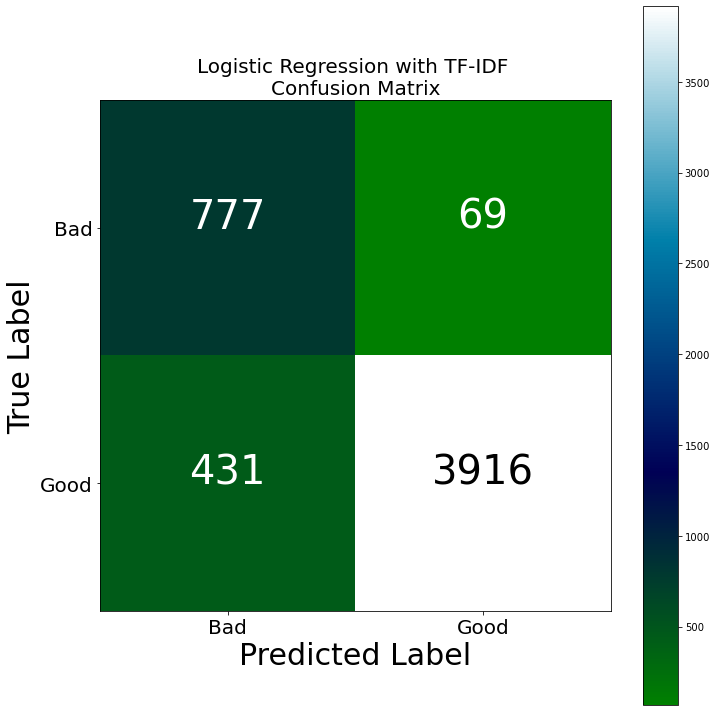

In [76]:
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "TF-IDF")

In [77]:
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

f1 score: 0.9100943765159808


In [78]:
print(classification_report(y_test, y_pred_tfidf_rf))

              precision    recall  f1-score   support

           0       0.92      0.55      0.69       846
           1       0.92      0.99      0.95      4347

    accuracy                           0.92      5193
   macro avg       0.92      0.77      0.82      5193
weighted avg       0.92      0.92      0.91      5193



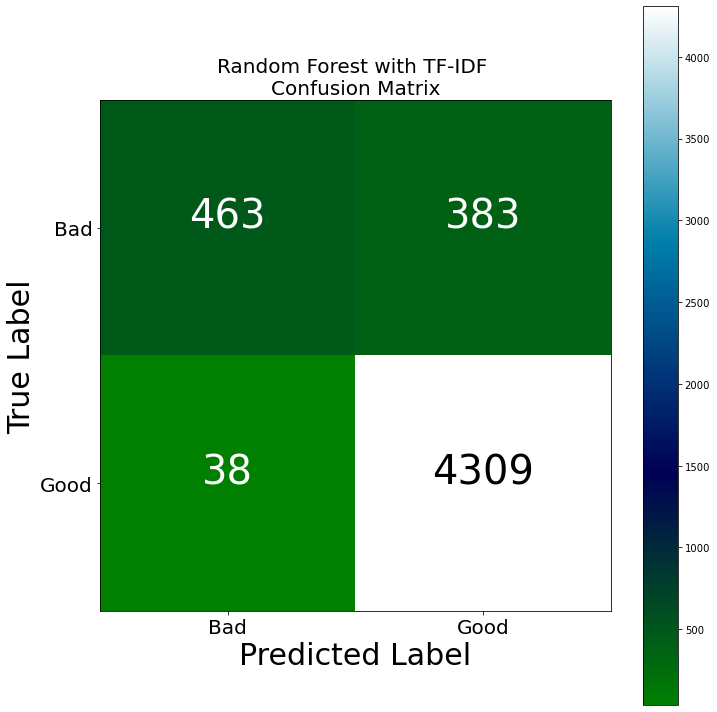

In [79]:
disp_confusion_matrix(y_pred_tfidf_rf, "Random Forest", "TF-IDF")

In [80]:
modeling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_nb = y_pred


f1 score: 0.8060141859210084


In [81]:
print(classification_report(y_test, y_pred_tfidf_nb))

              precision    recall  f1-score   support

           0       0.96      0.12      0.22       846
           1       0.85      1.00      0.92      4347

    accuracy                           0.86      5193
   macro avg       0.91      0.56      0.57      5193
weighted avg       0.87      0.86      0.81      5193



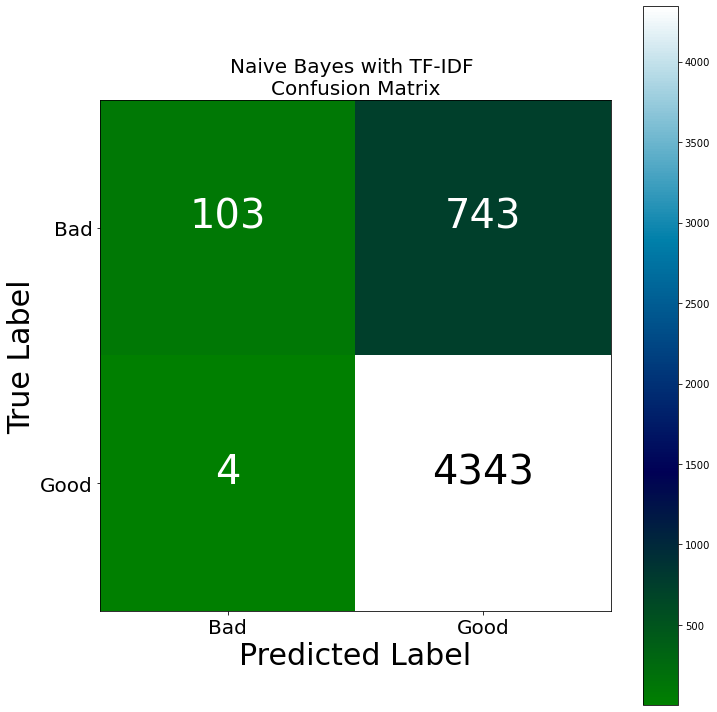

In [82]:
disp_confusion_matrix(y_pred_tfidf_nb, "Naive Bayes", "TF-IDF")

In [83]:
modeling(XGBClassifier(), tfidf_vect_train, tfidf_vect_test)

y_pred_tfidf_xgb = y_pred

[02:55:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score: 0.9300779213371986


In [84]:
print(classification_report(y_test, y_pred_tfidf_xgb))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       846
           1       0.95      0.97      0.96      4347

    accuracy                           0.93      5193
   macro avg       0.89      0.85      0.87      5193
weighted avg       0.93      0.93      0.93      5193



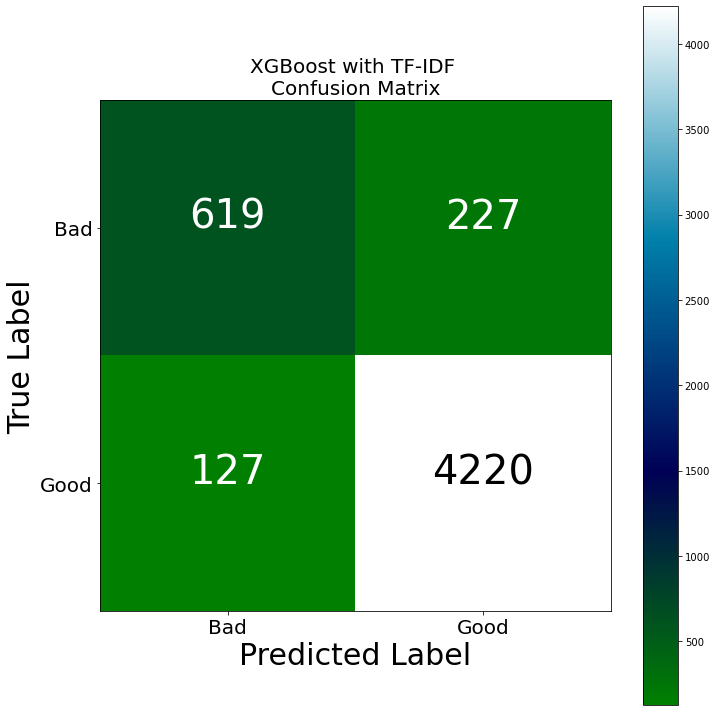

In [85]:
disp_confusion_matrix(y_pred_tfidf_xgb, "XGBoost", "TF-IDF")

In [86]:
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_catboost = y_pred

0:	learn: 0.3822152	total: 29.4ms	remaining: 2.91s
1:	learn: 0.3402980	total: 47.5ms	remaining: 2.33s
2:	learn: 0.3182568	total: 65.2ms	remaining: 2.11s
3:	learn: 0.2994828	total: 82.9ms	remaining: 1.99s
4:	learn: 0.2780505	total: 99.8ms	remaining: 1.9s
5:	learn: 0.2678062	total: 117ms	remaining: 1.84s
6:	learn: 0.2606194	total: 135ms	remaining: 1.79s
7:	learn: 0.2504757	total: 152ms	remaining: 1.74s
8:	learn: 0.2448009	total: 169ms	remaining: 1.71s
9:	learn: 0.2371786	total: 187ms	remaining: 1.68s
10:	learn: 0.2313296	total: 205ms	remaining: 1.65s
11:	learn: 0.2182812	total: 222ms	remaining: 1.63s
12:	learn: 0.2123370	total: 239ms	remaining: 1.6s
13:	learn: 0.2071037	total: 258ms	remaining: 1.58s
14:	learn: 0.1991924	total: 275ms	remaining: 1.56s
15:	learn: 0.1924188	total: 293ms	remaining: 1.54s
16:	learn: 0.1900341	total: 310ms	remaining: 1.51s
17:	learn: 0.1871786	total: 328ms	remaining: 1.5s
18:	learn: 0.1849040	total: 346ms	remaining: 1.48s
19:	learn: 0.1822836	total: 363ms	remai

In [87]:
print(classification_report(y_test, y_pred_tfidf_catboost))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       846
           1       0.94      0.97      0.95      4347

    accuracy                           0.92      5193
   macro avg       0.87      0.83      0.85      5193
weighted avg       0.92      0.92      0.92      5193



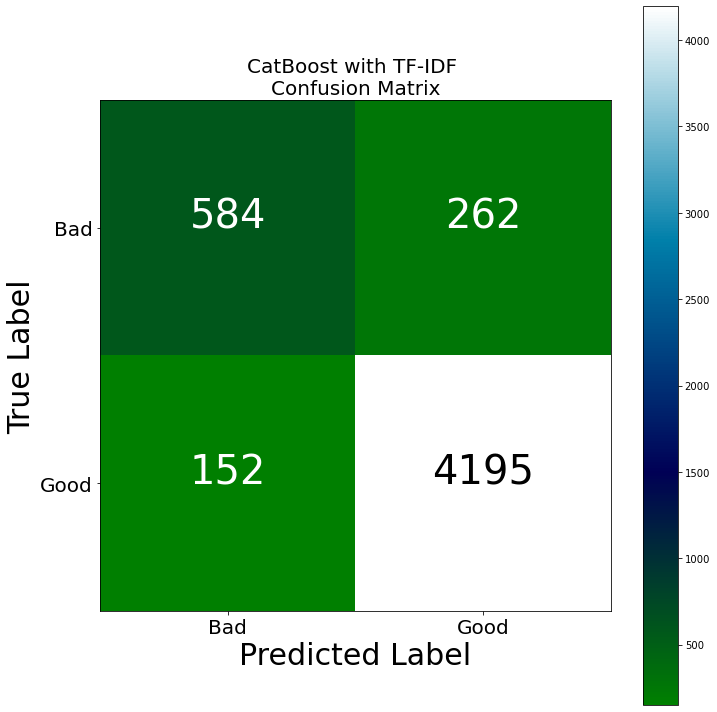

In [88]:
disp_confusion_matrix(y_pred_tfidf_catboost, "CatBoost", "TF-IDF")

In [89]:
comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf, y_pred_tfidf_nb, y_pred_tfidf_xgb, y_pred_tfidf_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [90]:
df_tv2

precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.903717 bad       0.643212  0.918440  0.756573   
                                  good      0.982685  0.900851  0.939990   
                                  average   0.927381  0.903717  0.910109   
           Random Forest 0.918929 bad       0.924152  0.547281  0.687454   
                                  good      0.918372  0.991258  0.953424   
                                  average   0.919313  0.918929  0.910094   
           Naive Bayes   0.856153 bad       0.962617  0.121749  0.216159   
                                  good      0.853913  0.999080  0.920810   
                                  average   0.871622  0.856153  0.806014   
           XGBoost       0.931831 bad       0.829759  0.731678  0.777638   
                                  good      0.948954  0.970784  0.959745   
                                  average   0.929536  0.931831  0.930078   
           CatBoost      0.920277 bad       0.793478  0.690307  0.738306   
                                  good      0.941216  0.965033  0.952976   
                                  average   0.917148  0.920277  0.918004   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.903717 bad        846.0  
                                  good      4347.0  
                                  average   5193.0  
           Random Forest 0.918929 bad        846.0  
                                  good      4347.0  
                                  average   5193.0  
           Naive Bayes   0.856153 bad        846.0  
                                  good      4347.0  
                                  average   5193.0  
           XGBoost       0.931831 bad        846.0  
                                  good      4347.0  
                                  average   5193.0  
           CatBoost      0.920277 bad        846.0  
                                  good      4347.0  
                                  average   5193.0

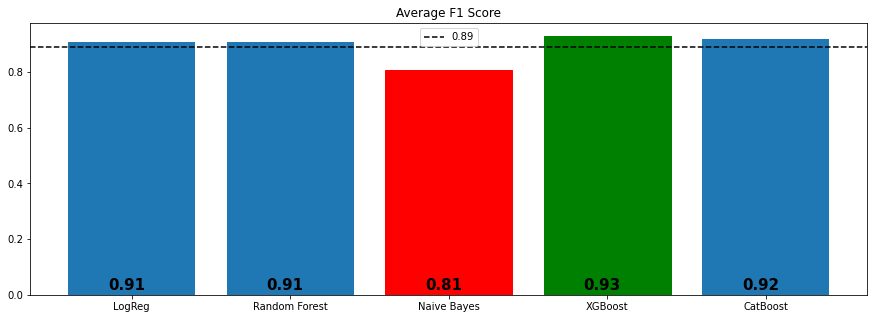

In [91]:
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

In [93]:
hash_vect = HashingVectorizer(n_features=2000, ngram_range=(1,1), alternate_sign=False)
hash_vect_train = hash_vect.fit_transform(X_train)
hash_vect_train = hash_vect_train.toarray()
hash_vect_test = hash_vect.transform(X_test)
hash_vect_test = hash_vect_test.toarray()

In [94]:
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_logreg = y_pred

f1 score: 0.892591487170334


In [95]:
print(classification_report(y_test, y_pred_hash_logreg))

              precision    recall  f1-score   support

           0       0.59      0.90      0.72       846
           1       0.98      0.88      0.93      4347

    accuracy                           0.88      5193
   macro avg       0.79      0.89      0.82      5193
weighted avg       0.92      0.88      0.89      5193



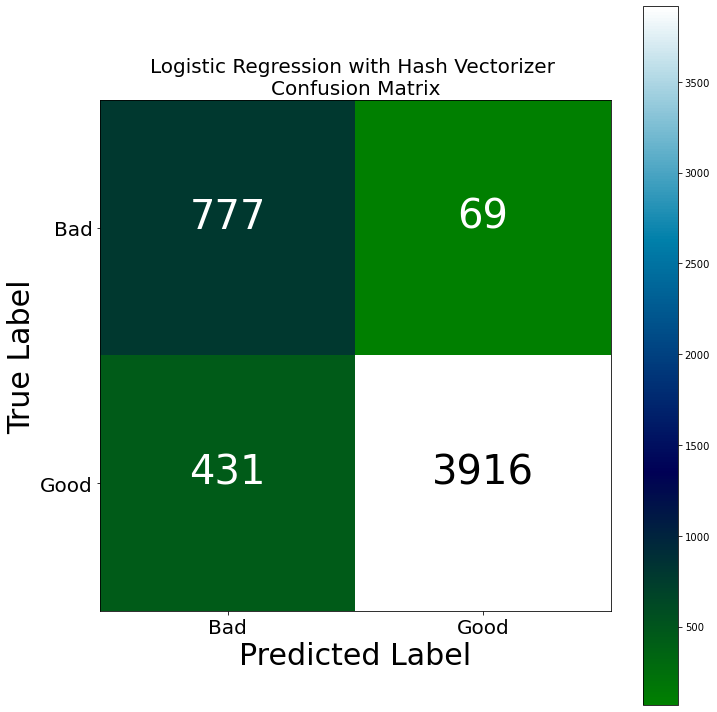

In [96]:
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "Hash Vectorizer")

In [97]:
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_rf = y_pred

f1 score: 0.912538851315976


In [98]:
print(classification_report(y_test, y_pred_hash_rf))

              precision    recall  f1-score   support

           0       0.89      0.58      0.70       846
           1       0.92      0.99      0.95      4347

    accuracy                           0.92      5193
   macro avg       0.91      0.78      0.83      5193
weighted avg       0.92      0.92      0.91      5193



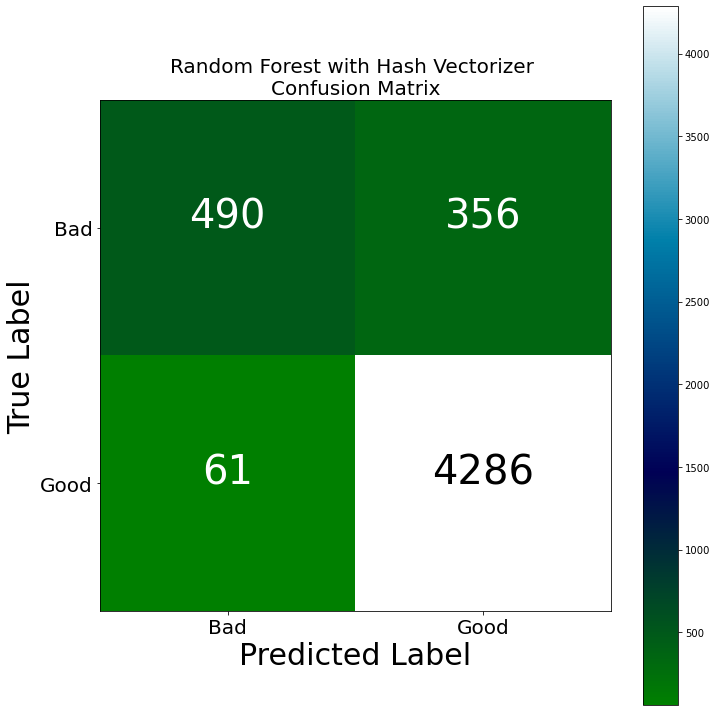

In [99]:
disp_confusion_matrix(y_pred_hash_rf, "Random Forest", "Hash Vectorizer")

In [100]:
modeling(MultinomialNB(), hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_nb = y_pred

f1 score: 0.8610872983645489


In [101]:
print(classification_report(y_test, y_pred_hash_nb))

              precision    recall  f1-score   support

           0       0.91      0.33      0.48       846
           1       0.88      0.99      0.94      4347

    accuracy                           0.88      5193
   macro avg       0.90      0.66      0.71      5193
weighted avg       0.89      0.88      0.86      5193



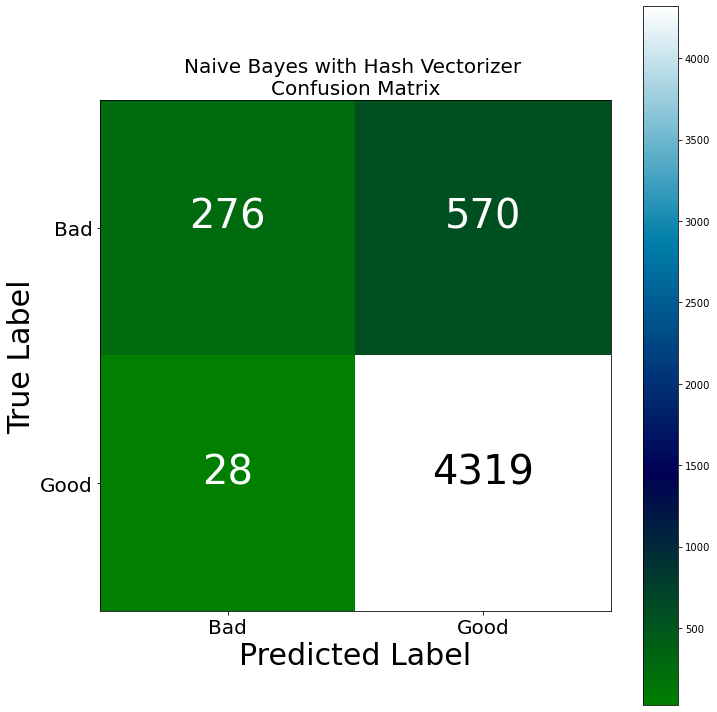

In [102]:
disp_confusion_matrix(y_pred_hash_nb, "Naive Bayes", "Hash Vectorizer")

In [103]:
modeling(XGBClassifier(), hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_xgb = y_pred

[03:06:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1 score: 0.9271348306729866


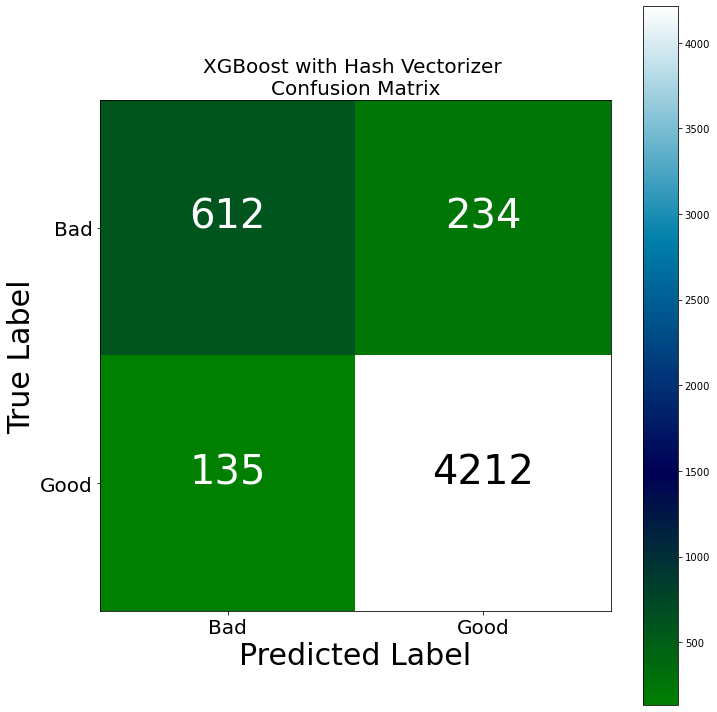

In [107]:
disp_confusion_matrix(y_pred_hash_xgb, "XGBoost", "Hash Vectorizer")


In [108]:
print(classification_report(y_test, y_pred_hash_xgb))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       846
           1       0.95      0.97      0.96      4347

    accuracy                           0.93      5193
   macro avg       0.88      0.85      0.86      5193
weighted avg       0.93      0.93      0.93      5193



In [109]:
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_catboost = y_pred

0:	learn: 0.3960509	total: 44.5ms	remaining: 4.4s
1:	learn: 0.3459056	total: 82ms	remaining: 4.02s
2:	learn: 0.3259063	total: 122ms	remaining: 3.94s
3:	learn: 0.3033798	total: 163ms	remaining: 3.91s
4:	learn: 0.2908360	total: 204ms	remaining: 3.88s
5:	learn: 0.2790747	total: 244ms	remaining: 3.83s
6:	learn: 0.2716198	total: 286ms	remaining: 3.81s
7:	learn: 0.2648270	total: 328ms	remaining: 3.78s
8:	learn: 0.2542961	total: 368ms	remaining: 3.72s
9:	learn: 0.2467226	total: 408ms	remaining: 3.67s
10:	learn: 0.2394751	total: 442ms	remaining: 3.58s
11:	learn: 0.2342905	total: 480ms	remaining: 3.52s
12:	learn: 0.2265802	total: 521ms	remaining: 3.49s
13:	learn: 0.2212716	total: 562ms	remaining: 3.45s
14:	learn: 0.2148771	total: 588ms	remaining: 3.33s
15:	learn: 0.2098716	total: 601ms	remaining: 3.16s
16:	learn: 0.2074031	total: 615ms	remaining: 3s
17:	learn: 0.2045602	total: 628ms	remaining: 2.86s
18:	learn: 0.1977715	total: 641ms	remaining: 2.73s
19:	learn: 0.1961700	total: 654ms	remaining: 

In [110]:
print(classification_report(y_test, y_pred_hash_catboost))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       846
           1       0.94      0.96      0.95      4347

    accuracy                           0.92      5193
   macro avg       0.86      0.83      0.84      5193
weighted avg       0.91      0.92      0.92      5193



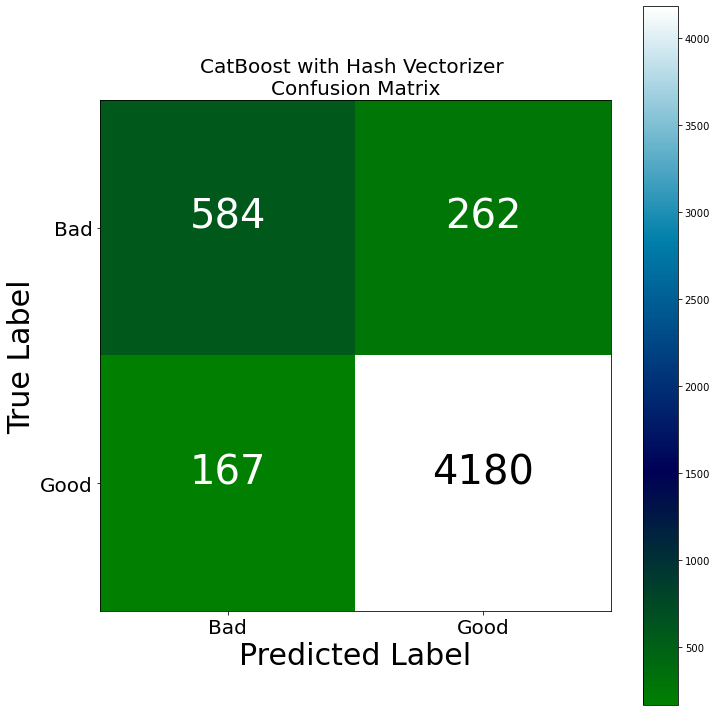

In [111]:
disp_confusion_matrix(y_pred_hash_catboost, "CatBoost", "Hash Vectorizer")

In [112]:
comparison_table(y_preds = [y_pred_hash_logreg, y_pred_hash_rf, y_pred_hash_nb, y_pred_hash_xgb, y_pred_hash_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [113]:
df_tv2

precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.883690 bad       0.594090  0.903073  0.716698   
                                  good      0.979012  0.879917  0.926823   
                                  average   0.916304  0.883690  0.892591   
           Random Forest 0.919700 bad       0.889292  0.579196  0.701503   
                                  good      0.923309  0.985967  0.953610   
                                  average   0.917767  0.919700  0.912539   
           Naive Bayes   0.884845 bad       0.907895  0.326241  0.480000   
                                  good      0.883412  0.993559  0.935253   
                                  average   0.887400  0.884845  0.861087   
           XGBoost       0.928943 bad       0.819277  0.723404  0.768362   
                                  good      0.947368  0.968944  0.958035   
                                  average   0.926501  0.928943  0.927135   
           CatBoost      0.917389 bad       0.777630  0.690307  0.731371   
                                  good      0.941018  0.961583  0.951189   
                                  average   0.914400  0.917389  0.915378   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.883690 bad        846.0  
                                  good      4347.0  
                                  average   5193.0  
           Random Forest 0.919700 bad        846.0  
                                  good      4347.0  
                                  average   5193.0  
           Naive Bayes   0.884845 bad        846.0  
                                  good      4347.0  
                                  average   5193.0  
           XGBoost       0.928943 bad        846.0  
                                  good      4347.0  
                                  average   5193.0  
           CatBoost      0.917389 bad        846.0  
                                  good      4347.0  
                                  average   5193.0

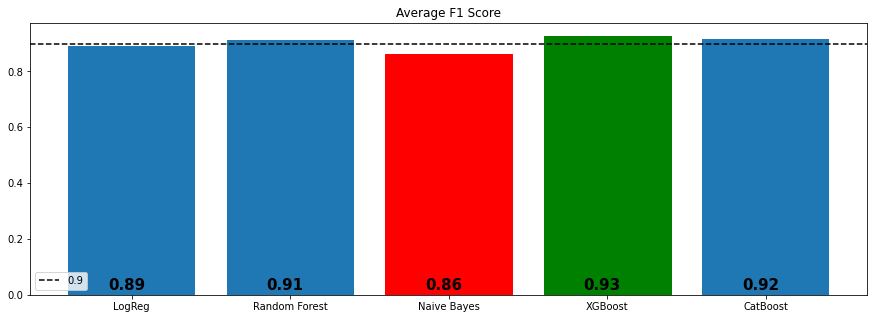

In [114]:
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

In [122]:
df1

,reviewerID,asin,brand,review_text,rating_cat,clean_text,year,rating_category,token,review_length,review_length_bin
0,A2X4TZM7CXZYLQ,B00004UE2D,Yamaha,In very great condition. Loved it overall It c...,good,great condition love overall come fresh new bo...,2017,1,"['great', 'condition', 'love', 'overall', 'com...",24,"(0.0, 100.0]"
1,A2EV1FI3EDBOD2,B00004UE2D,Yamaha,I am writing a two star review because it says...,bad,write two star review say write two star revie...,2017,0,"['write', 'two', 'star', 'review', 'say', 'wri...",70,"(0.0, 100.0]"
2,A1B3TNHKV3M24H,B00004UE2D,Yamaha,Arrived damaged! Guitar arrived on time but th...,bad,arrive damage guitar arrive time base major ga...,2017,0,"['arrive', 'damage', 'guitar', 'arrive', 'time...",53,"(0.0, 100.0]"
3,A1R38HWRXBMKA4,B00004UE2D,Yamaha,Five Stars Very good! No problems all all!,good,five star good no problehems,2017,1,"['five', 'star', 'good', 'no', 'problehems']",10,"(0.0, 100.0]"
4,A1865S6TEXPNX0,B00004UE2D,Yamaha,Five Stars Love it,good,five star love,2017,1,"['five', 'star', 'love']",4,"(0.0, 100.0]"
...,...,...,...,...,...,...,...,...,...,...,...
20766,A29L4DKRIRSDMP,B01HG0FXAI,Fender,Weak pick ups Great guitar but pick ups are a ...,good,weak pick up great guitar pick up bite weak ta...,2018,1,"['weak', 'pick', 'up', 'great', 'guitar', 'pic...",43,"(0.0, 100.0]"
20767,A2GFEO12S2Q8BK,B01HG0FXAI,Fender,"Great sound, great looks. Fun guitar and you g...",good,great sound great look fun guitar get lot guit...,2018,1,"['great', 'sound', 'great', 'look', 'fun', 'gu...",132,"(100.0, 200.0]"
20768,A11Y478PJDW2QV,B01HG0FXAI,Fender,"Do not buy online or site unseen, quality vari...",good,not buy online site unseen quality vary way mu...,2017,1,"['not', 'buy', 'online', 'site', 'unseen', 'qu...",104,"(100.0, 200.0]"
20769,A2T3EI2FG3VH4N,B01HG0FXAI,Fender,A good guitar Ive been really enjoing this gui...,good,good guitar ive really enjoing guitar receive ...,2017,1,"['good', 'guitar', 'ive', 'really', 'enjoing',...",32,"(0.0, 100.0]"
